In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from fbprophet import Prophet

# load the json file
logins = pd.read_json('logins.json')


In [4]:
# show some of the data
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# show some statistics of the data
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


The year for the data is stuck in 1970.  Assume that the data should be 2019.
There are duplicates, but this is ok, as multiple users could log in at the same time

In [6]:
# Fix the bad year data
logins['login_time'] = logins['login_time'].apply(lambda dt: dt.replace(year=2019))

In [7]:
# create a 'y' column to make counting easier
logins['y'] = 1

# set login_time as the dataframe index
logins = logins.set_index('login_time')



In [8]:
# resample at 15 minute intervals 15T = 15 minutes
logins_resampled_15 = logins.resample('15T').sum()
logins_resampled_15 = logins_resampled_15.reset_index().rename(columns={'login_time': 'ds'})
logins_resampled_15

,ds,y
0,2019-01-01 20:00:00,2
1,2019-01-01 20:15:00,6
2,2019-01-01 20:30:00,9
3,2019-01-01 20:45:00,7
4,2019-01-01 21:00:00,1
...,...,...
9783,2019-04-13 17:45:00,5
9784,2019-04-13 18:00:00,5
9785,2019-04-13 18:15:00,2
9786,2019-04-13 18:30:00,7


In [9]:
# resample again for visualization
logins_resampled_60 = logins.resample('60T').sum()
logins_resampled_60 = logins_resampled_60.reset_index()

(737060.8333333334, 737162.75)

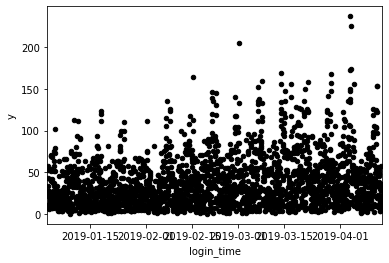

In [11]:
# plot data
logins_resampled_60.plot(x='login_time', y='y', kind="scatter", color='black')
plt.xlim(logins_resampled_60['login_time'].min(), logins_resampled_60['login_time'].max())

In [12]:
# use Facebook Prophet to fit and model the data, splitting effects into trend, weekly, and daily components
model = Prophet()
model.fit(logins_resampled_15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


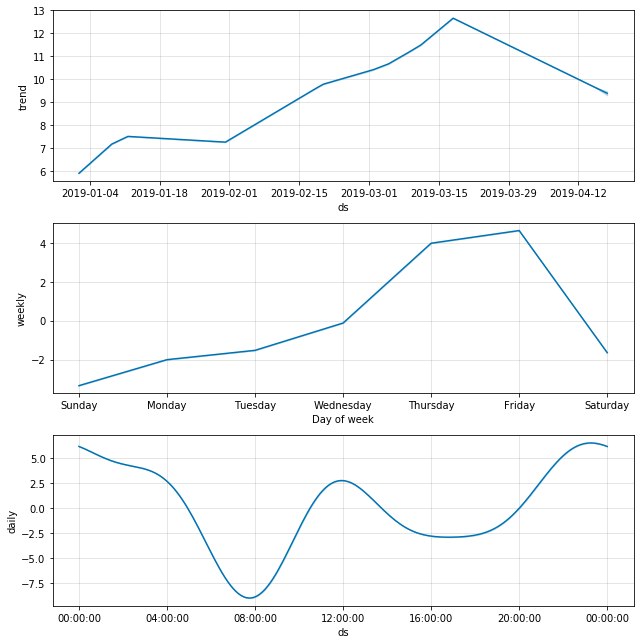

In [14]:
future = model.make_future_dataframe(periods=4)
forecast = model.predict(future)
_ = model.plot_components(forecast)

## Interpretation
Logins tend to peak and mid-day and late night, with very few logins occurring in the early morning.  Thursday and  Friday are peak days.  